## Import libraries useful to our exploratoy data analysis

In [1]:
# import libraries

# pretty display of variables
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import pandas as pd
import seaborn as sns

In [2]:
 columns_name=["user_id", "item_id", "rating", "timestamp"]

In [3]:
ratings=pd.read_csv('./data/ml-100k/u.data', delim_whitespace=True, names=columns_name) 

In [4]:
ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
ratings.timestamp = pd.to_datetime(ratings.timestamp, unit='s')

In [6]:
ratings.rename(columns={'timestamp':'date_time'}, inplace=True)

In [7]:
ratings.head()

,user_id,item_id,rating,date_time
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


In [8]:
#ratings = ratings.set_index('date_time')

In [9]:
#ratings.head()

In [10]:
ratings.dtypes

user_id               int64
item_id               int64
rating                int64
date_time    datetime64[ns]
dtype: object

In [11]:
ratings['user_id'] = ratings['user_id'].astype('object')
ratings['item_id'] = ratings['item_id'].astype('object')

In [12]:
ratings.dtypes

user_id              object
item_id              object
rating                int64
date_time    datetime64[ns]
dtype: object

In [13]:
ratings.isna().sum()

user_id      0
item_id      0
rating       0
date_time    0
dtype: int64

In [14]:
ratings.describe()

,rating
count,100000.000000
mean,3.529860
std,1.125674
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


In [15]:
ratings.date_time.describe()


count                  100000
unique                  49282
top       1998-03-27 21:20:06
freq                       12
first     1997-09-20 03:05:10
last      1998-04-22 23:10:38
Name: date_time, dtype: object

In [16]:
ratings.rating.value_counts().sort_index()

1     6110
2    11370
3    27145
4    34174
5    21201
Name: rating, dtype: int64

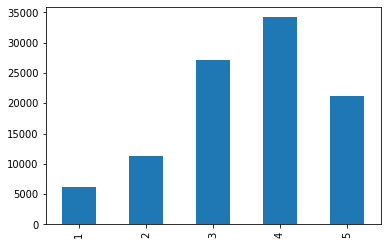

In [17]:
ratings.rating.value_counts().sort_index().plot(kind='bar');
# right skewed gaussian, users tends to give an above average review

In [18]:
ratings.user_id.value_counts()

405    737
655    685
13     636
450    540
276    518
      ... 
36      20
34      20
685     20
441     20
202     20
Name: user_id, Length: 943, dtype: int64

In [19]:
ratings.user_id.value_counts().describe()

count    943.000000
mean     106.044539
std      100.931743
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
Name: user_id, dtype: float64

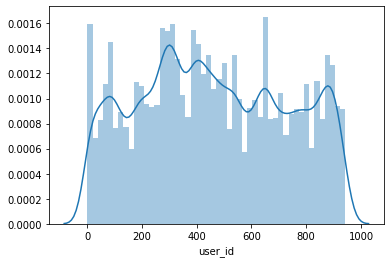

In [20]:
sns.distplot(ratings.user_id)
# left skewed, users tends to 

In [21]:
ratings.user_id.value_counts().value_counts()

20     32
21     24
22     23
23     21
24     21
       ..
134     1
240     1
239     1
238     1
737     1
Name: user_id, Length: 279, dtype: int64

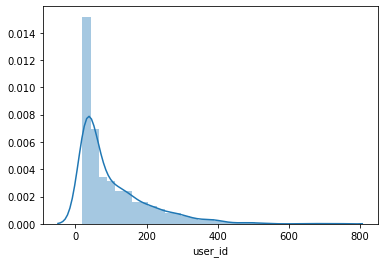

In [22]:
sns.distplot(ratings.user_id.value_counts())
# left skewed, most of users rate the minimum 20 requiered and adove. Few of them rates hundreds

In [23]:
ratings.item_id.value_counts()

50      583
258     509
100     508
181     507
294     485
       ... 
1452      1
1593      1
1447      1
814       1
1682      1
Name: item_id, Length: 1682, dtype: int64

In [24]:
ratings.item_id.value_counts().value_counts()

1      141
2       68
4       64
3       60
5       51
      ... 
189      1
188      1
187      1
185      1
142      1
Name: item_id, Length: 273, dtype: int64

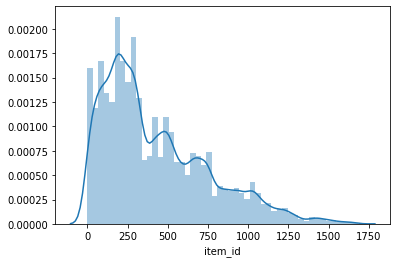

In [25]:
sns.distplot(ratings.item_id)
# ?! check what is distplot and how to interpret it

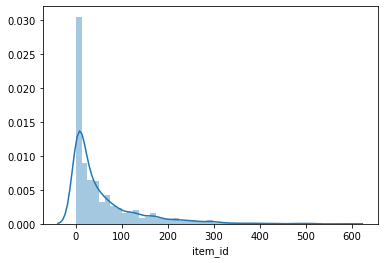

In [26]:
sns.distplot(ratings.item_id.value_counts())

In [27]:
ratings.groupby('item_id')['rating'].agg([pd.np.mean]).describe()

,mean
count,1682.000000
mean,3.076045
std,0.781662
min,1.000000
25%,2.659600
50%,3.161528
75%,3.653428
max,5.000000


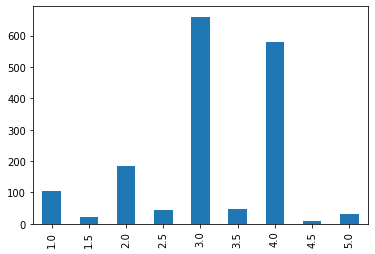

In [28]:
ratings.groupby('item_id')['rating'].agg([pd.np.median])['median'].value_counts().sort_index().plot(kind='bar')

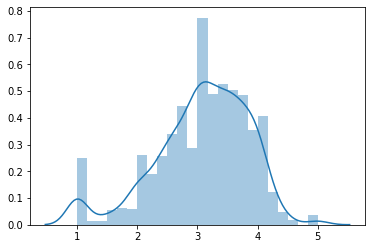

In [29]:
sns.distplot(ratings.groupby('item_id')['rating'].agg([pd.np.mean]))

In [30]:
ratings.groupby('user_id')['rating'].agg([pd.np.mean]).describe()

,mean
count,943.000000
mean,3.588191
std,0.445233
min,1.491954
25%,3.323054
50%,3.620690
75%,3.869565
max,4.869565


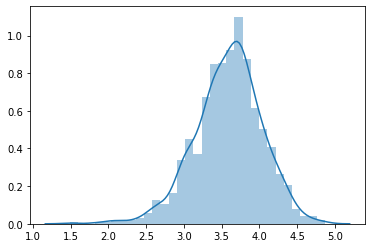

In [31]:
sns.distplot(ratings.groupby('user_id')['rating'].agg([pd.np.mean]))
# users tends to rate a little bit above the average

In [32]:
# as people may have their own scale of rating, we'll substract the mean of the user ratings from each rating of a user.

In [33]:
ratings.groupby('user_id')['rating'].agg([pd.np.mean]).describe()

,mean
count,943.000000
mean,3.588191
std,0.445233
min,1.491954
25%,3.323054
50%,3.620690
75%,3.869565
max,4.869565


In [46]:
# load_data.py

import pandas as pd
from surprise import Dataset
from surprise import Reader

from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

In [49]:
# This is the same data that was plotted for similarity earlier
# with one new user "E" who has rated only movie 1
ratings_dict = {
    "item": [1, 2, 1, 2, 1, 2, 1, 2, 1],
    "user": ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D', 'E'],
    "rating": [1, 2, 2, 4, 2.5, 4, 4.5, 5, 3],
}
ratings_dict
df = pd.DataFrame(ratings_dict)
df
reader = Reader(rating_scale=(1, 5))
reader
# Loads Pandas dataframe
data = Dataset.load_from_df(df[["user", "item", "rating"]], reader)
# Loads the builtin Movielens-100k data
movielens = Dataset.load_from_file("./data/ml-100k/u.data", reader)
movielens


# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
cross_validate(algo, movielens, measures=['RMSE', 'MAE'], cv=5, verbose=True)

{'item': [1, 2, 1, 2, 1, 2, 1, 2, 1],
 'user': ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D', 'E'],
 'rating': [1, 2, 2, 4, 2.5, 4, 4.5, 5, 3]}

,item,user,rating
0,1,A,1.0
1,2,A,2.0
2,1,B,2.0
3,2,B,4.0
4,1,C,2.5
5,2,C,4.0
6,1,D,4.5
7,2,D,5.0
8,1,E,3.0


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9401  0.9375  0.9337  0.9364  0.9328  0.9361  0.0026  
MAE (testset)     0.7425  0.7350  0.7366  0.7372  0.7344  0.7371  0.0029  
Fit time          6.46    6.34    6.15    6.25    6.74    6.39    0.21    
Test time         0.26    0.17    0.16    0.25    0.16    0.20    0.05    


{'test_rmse': array([0.94010137, 0.93746986, 0.93367368, 0.93642269, 0.93276652]),
 'test_mae': array([0.74251796, 0.73496495, 0.73655733, 0.73724225, 0.73436567]),
 'fit_time': (6.459594249725342,
  6.340508937835693,
  6.151391506195068,
  6.248444080352783,
  6.744791269302368),
 'test_time': (0.26020288467407227,
  0.16611886024475098,
  0.16111493110656738,
  0.2491772174835205,
  0.16213393211364746)}

In [50]:
# recommender.py

from surprise import KNNWithMeans

# To use item-based cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute  similarities between items
}
algo = KNNWithMeans(sim_options=sim_options)

In [52]:


trainingSet = movielens.build_full_trainset()

algo.fit(trainingSet)



Computing the cosine similarity matrix...
Done computing similarity matrix.


In [54]:
prediction = algo.predict('E', 2)
prediction.est

3.52986

Ressources :
- https://surprise.readthedocs.io/
- http://surpriselib.com/
- https://www.kernix.com/article/recommender-system-based-on-natural-language-processing/
- https://realpython.com/build-recommendation-engine-collaborative-filtering/
- https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system
- https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/
- https://www.datacamp.com/community/tutorials/recommender-systems-python
- https://medium.com/code-heroku/building-a-movie-recommendation-engine-in-python-using-scikit-learn-c7489d7cb145
- https://stackabuse.com/creating-a-simple-recommender-system-in-python-using-pandas/
- https://www.geeksforgeeks.org/python-implementation-of-movie-recommender-system/
- https://towardsdatascience.com/how-to-build-a-simple-recommender-system-in-python-375093c3fb7d


    